Logistic map:

$f(x) = 4x(1-x)$

In [1]:
f(x) = 4x*(1-x)

f (generic function with 1 method)

In [2]:
using IntervalConstraintProgramming, ValidatedNumerics

In [3]:
C = @constraint 4x*(1-x) ∈ [0.3, 0.4]

Separator:
- variables: x
- expression: (4x) * (1 - x) ∈ [0.299999, 0.400001]


In [4]:
X = IntervalBox(0..1)

[0, 1]

In [5]:
paving = pave(C, X)

Paving:
- tolerance ϵ = 0.01
- inner approx. of length 4
- boundary approx. of length 4

In [6]:
paving.inner

4-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}:
 [0.901015, 0.916761] 
 [0.889014, 0.901016] 
 [0.0989849, 0.110986]
 [0.0832394, 0.098985]

In [6]:
paving.boundary

4-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}:
 [0.91676, 0.918335]   
 [0.886832, 0.889015]  
 [0.110985, 0.113168]  
 [0.0816653, 0.0832395]

Inverse functions:


In [7]:
g1(x) = (1/2) * (1 + √(1-x))
g2(x) = (1/2) * (1 - √(1-x))

g2 (generic function with 1 method)

In [8]:
Y = IntervalBox(hull(g2(Interval(0.3)), g2(Interval(0.4))))

[0.0816699, 0.112702]

In [9]:
setdiff(Y, paving)

0-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}

In [10]:
setdiff(Y, paving.inner)

2-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}:
 [0.0816699, 0.0832395]
 [0.110985, 0.112702]  

Second iterate:

In [69]:
C2 = @constraint 4*(4x*(1-x))*(1-(4x*(1-x))) ∈ [0.3, 0.4]

Separator with variables x

In [77]:
paving = pave(C2, X, 1e-6)

Paving:
- tolerance ϵ = 1.0e-6
- inner approx. of length 122
- boundary approx. of length 20

In [74]:
paving.inner

68-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}:
 [0.974218, 0.978592]  
 [0.978878, 0.979118]  
 [0.978591, 0.978879]  
 [0.971488, 0.974219]  
 [0.971088, 0.971489]  
 [0.971, 0.971089]     
 [0.657081, 0.660659]  
 [0.666639, 0.666798]  
 [0.666797, 0.667132]  
 [0.667836, 0.66784]   
 [0.667131, 0.667405]  
 [0.66762, 0.66771]    
 [0.667772, 0.667806]  
 ⋮                     
 [0.332379, 0.332596]  
 [0.33229, 0.33238]    
 [0.332227, 0.332291]  
 [0.332163, 0.332165]  
 [0.332194, 0.332228]  
 [0.33216, 0.332164]   
 [0.0257812, 0.0285113]
 [0.0289111, 0.0289997]
 [0.0285112, 0.0289112]
 [0.021408, 0.0257813] 
 [0.0211211, 0.0214081]
 [0.020882, 0.0211212] 

Inverses:

In [78]:
Vol(paving.boundary)

1-dimensional length: [9.36162e-06, 9.36163e-06]

In [79]:
paving.boundary

20-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}:
 [0.979147, 0.979148]  
 [0.970982, 0.970983]  
 [0.667857, 0.667859]  
 [0.667855, 0.667857]  
 [0.667854, 0.667856]  
 [0.667852, 0.667854]  
 [0.642891, 0.642893]  
 [0.642889, 0.642891]  
 [0.642888, 0.64289]   
 [0.642886, 0.642887]  
 [0.357113, 0.357114]  
 [0.35711, 0.357112]   
 [0.357109, 0.357111]  
 [0.357107, 0.357109]  
 [0.332146, 0.332148]  
 [0.332144, 0.332146]  
 [0.332143, 0.332145]  
 [0.332141, 0.332143]  
 [0.0290173, 0.0290178]
 [0.0208522, 0.0208524]

In [17]:
h1(x) = (1/2) * (1 - √(1 - √(1 - x)) / √2)

h1 (generic function with 1 method)

In [18]:
Y = IntervalBox(hull(h1(Interval(0.3)), h1(Interval(0.4))))

[0.332144, 0.357111]

In [19]:
setdiff(Y, paving)

0-element Array{ValidatedNumerics.IntervalBox{1,Float64},1}

## Forward and reverse by hand

In [2]:
x = 0..1

[0, 1]

Do `@constraint f(f(x)) in [0.3,0.4]` by hand:

In [38]:
#ex = :(4x*(1-x))
#-4(x^2 - x)
ex = :(-4( (x-0.5)^2 - 0.25 ))

f_forward_code = IntervalConstraintProgramming.forward_pass(ex)
f_reverse_code = IntervalConstraintProgramming.backward_pass(ex)

f_forward = eval(f_forward_code)
f_reverse = eval(f_reverse_code)


(anonymous function)

In [29]:
x = 0..1

[0, 1]

In [30]:
f_forward_code

:((x,)->begin  # /Users/dpsanders/.julia/v0.4/IntervalConstraintProgramming/src/contractor.jl, line 248:
            begin 
                _z10_ = x - 0.5
                _z11_ = _z10_ ^ 2
                _z12_ = _z11_ - 0.25
                _z13_ = -4_z12_
                return (_z10_,_z11_,_z12_,_z13_)
            end
        end)

In [32]:
z1, z2, z3 = f_forward(x)

([-0.5, 0.5],[0, 0.25],[-0.25, 0],[-0, 1])

In [34]:
z4, z5, z6 = f_forward(z3)
z6 = z6 ∩ (0.3..0.4)

[0.299999, 0.3125]

In [21]:
include("../src/reverse_mode.jl")

pow_rev2 (generic function with 1 method)

In [22]:
z3_new = f_reverse(z3, z4, z5, z6)[1]

[-0, 0.981251]

In [23]:
z3 = z3 ∩ z3_new

[-0, 0.981251]

In [26]:
x_new = f_reverse(x, z1, z2, z3)[1]

[0, 1]

In [27]:
x = x ∩ x_new

[0, 1]

## Use better expression with single occurrence of x:

In [36]:
ex = :(-4( (x-0.5)^2 - 0.25 ))

g_forward_code = IntervalConstraintProgramming.forward_pass(ex)
g_reverse_code = IntervalConstraintProgramming.backward_pass(ex)

g_forward = eval(f_forward_code)
g_reverse = eval(f_reverse_code)


(anonymous function)

In [39]:
g_forward_code

:((x,)->begin  # /Users/dpsanders/.julia/v0.4/IntervalConstraintProgramming/src/contractor.jl, line 248:
            begin 
                _z26_ = x - 0.5
                _z27_ = _z26_ ^ 2
                _z28_ = _z27_ - 0.25
                _z29_ = -4_z28_
                return (_z26_,_z27_,_z28_,_z29_)
            end
        end)

In [40]:
g_reverse_code

:((x,_z30_,_z31_,_z32_,_z33_)->begin  # /Users/dpsanders/.julia/v0.4/IntervalConstraintProgramming/src/contractor.jl, line 248:
            begin 
                (_z33_,_,_z32_) = mul_rev(_z33_,-4,_z32_)
                (_z32_,_z31_,_) = minus_rev(_z32_,_z31_,0.25)
                (_z31_,_z30_,_) = power_rev(_z31_,_z30_,2)
                (_z30_,x,_) = minus_rev(_z30_,x,0.5)
                return (x,)
            end
        end)

In [47]:
x = 0..1
z1, z2, z3, z4 = g_forward(x)

([-0.5, 0.5],[0, 0.25],[-0.25, 0],[-0, 1])

In [48]:
z5, z6, z7, z8 = g_forward(z4)
z8 = z8 ∩ (0.3..0.4)

[0.299999, 0.400001]

In [49]:
z4_new = g_reverse(z4, z5, z6, z7, z8)[1]

[0.0816699, 0.918331]

In [50]:
z4 = z4 ∩ z4_new

[0.0816699, 0.918331]

In [53]:
x_new = g_reverse(x, z1, z2, z3, z4)[1]
x = x ∩ x_new

[0.0208523, 0.979148]

Next step: bisect

In [54]:
x = Interval(x.lo, mid(x))
z1, z2, z3, z4 = g_forward(x)

([-0.479148, 0],[0, 0.229583],[-0.25, -0.0204174],[0.0816699, 1])

In [55]:
z5, z6, z7, z8 = g_forward(z4)
z8 = z8 ∩ (0.3..0.4)

[0.299999, 0.400001]

In [56]:
z4_new = g_reverse(z4, z5, z6, z7, z8)[1]

[0.0816699, 0.918331]

In [57]:
z4 = z4 ∩ z4_new

[0.0816699, 0.918331]

In [58]:
x_new = g_reverse(x, z1, z2, z3, z4)[1]
x = x ∩ x_new

[0.0208523, 0.357111]

Next step: bisect again:

In [80]:
x = Interval(x.lo, mid(x))
z1, z2, z3, z4 = g_forward(x)

([-0.479148, -0.311018],[0.0967326, 0.229583],[-0.153268, -0.0204174],[0.0816699, 0.61307])

In [81]:
z5, z6, z7, z8 = g_forward(z4)
z8 = z8 ∩ (0.3..0.4)

[0.299999, 0.400001]

In [82]:
z4_new = g_reverse(z4, z5, z6, z7, z8)[1]

[0.0816699, 0.112702]

In [83]:
z4 = z4 ∩ z4_new

[0.0816699, 0.112702]

In [84]:
x_new = g_reverse(x, z1, z2, z3, z4)[1]
x = x ∩ x_new

[0.0208523, 0.0290175]

In [85]:
Vol(ans)

1-dimensional length: [0.00816511, 0.00816512]

## Monotonicity from derivative constraints

In [3]:
using ForwardDiff

In [5]:
f(x) = 4x*(1-x)
f_deriv = x -> ForwardDiff.derivative(f, x)

(anonymous function)

In [6]:
using PyPlot

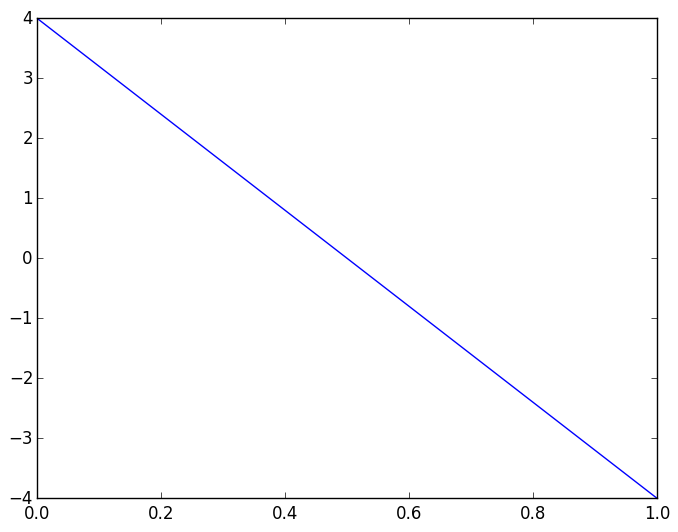

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31af3ee90>

In [7]:
xx = 0:0.01:1
plot(xx, map(f_deriv, xx))